In [1]:
import os

from pathlib import Path

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from sdm_eurec4a.visulization import set_custom_rcParams
from sdm_eurec4a.identifications import match_clouds_and_cloudcomposite


In [2]:
plt.style.use("default")
default_colors = set_custom_rcParams()

# Example dataset
script_path = Path().absolute()
print(script_path)

REPOSITORY_ROOT = Path(script_path).parent
print(REPOSITORY_ROOT)


fig_path = REPOSITORY_ROOT / Path("results/cluster_identification/")
fig_path.mkdir(parents=True, exist_ok=True)


/home/m/m301096/repositories/sdm-eurec4a/notebooks
/home/m/m301096/repositories/sdm-eurec4a


In [77]:


# Load data

mask_name = "cloud_mask"

identified_clouds = xr.open_dataset(
    REPOSITORY_ROOT
    / Path(
        f"data/observation/cloud_composite/processed/identified_clouds/identified_clouds_{mask_name}.nc"
    )
)
# select only clouds which are between 800 and 1100 m
ds_clouds = identified_clouds.where(
    (identified_clouds.alt >= 800) & (identified_clouds.alt <= 1100), drop=True
)

identified_clusters = xr.open_dataset(
    REPOSITORY_ROOT
    / Path(
        f"data/observation/cloud_composite/processed/identified_clusters/identified_clusters_{mask_name}_10.nc"
    )
)
ds_clusters = identified_clusters.where(
    (identified_clusters.alt >= 800) & (identified_clusters.alt <= 1100), drop=True
)

cloud_composite = xr.open_dataset(
    REPOSITORY_ROOT / Path("data/observation/cloud_composite/processed/cloud_composite.nc"),
    chunks={"time": 1000},
)


Text(0.5, 1.0, 'Duration of clouds and clusters')

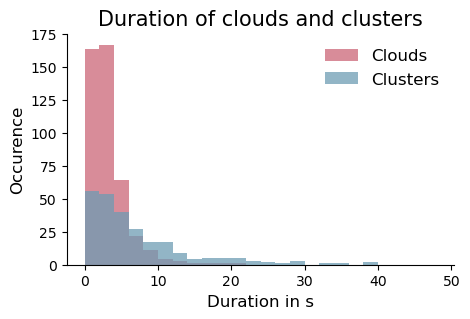

In [78]:
# Plotting relation of duration and LWC of clouds

fig, ax = plt.subplots(1, 1, figsize=(5, 3), sharex=True, sharey=True)

ax.hist(
    ds_clouds.duration.data.astype("timedelta64[s]").astype(float),
    bins = np.arange(0, 50, 2),
    label = "Clouds",
    alpha = 0.75,
)
# For clusters
ax.hist(
    ds_clusters.duration.data.astype("timedelta64[s]").astype(float),
    bins = np.arange(0, 50, 2),
    label = "Clusters",
    alpha = 0.75,
)
ax.set_xlabel("Duration in s")
ax.set_ylabel("Occurence")
ax.legend()
ax.set_title("Duration of clouds and clusters")

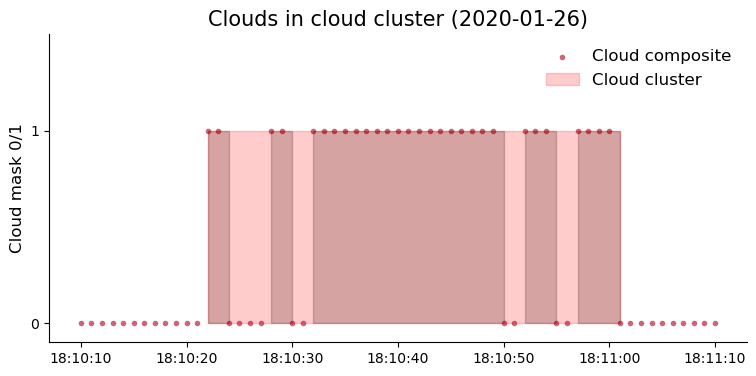

In [83]:
time_slice = slice("2020-01-26 18:10:10", "2020-01-26 18:11:10")
fig, ax = plt.subplots(ncols=1, nrows=1, figsize = (9,4))

single_clouds = ds_clouds.sel(time = time_slice)
single_cluster =ds_clusters.sel(time = time_slice)


ax.scatter(
    cloud_composite.sel(time = time_slice).time, 
    cloud_composite.sel(time = time_slice).cloud_mask, 
    marker = ".",
    label = "Cloud composite")

y = np.arange(0,2)
for select_time in single_clouds.time:
    ax.fill_betweenx(
        y = y,
        x1 = single_clouds.sel(time = select_time).start,
        x2 = single_clouds.sel(time = select_time).end,
        color = "k",
        alpha = 0.2
        )
ax.fill_betweenx(
    y = y,
    x1 = single_cluster.start,
    x2 = single_cluster.end,
    label = "Cloud cluster",
    color = "r",
    alpha = 0.2
    )

ax.legend()
plt.fill_between

ax.set_ylim(-0.1,1.1)
ax.set_yticks([0,1])
ax.set_ylim(-0.1,1.5)
ax.set_ylabel("Cloud mask 0/1")
ax.set_title(f"Clouds in cloud cluster (2020-01-26)")
fig.savefig("Cloud_Cluster.svg", bbox_inches="tight")

